In [1]:
!pip install kaggle

In [2]:
import json
import os
from zipfile import ZipFile

In [3]:
kaggle_credentails = json.load(open("kaggle.json"))

In [4]:
print(kaggle_credentails)

{'username': 'shreyansh0210', 'key': '79d390f8d24d2435c9bafdafdfd55890'}


In [8]:
os.environ['KAGGLE_USERNAME'] = kaggle_credentails["username"]
os.environ['KAGGLE_KEY'] = kaggle_credentails["key"]

Soil Dataset

In [9]:
!kaggle datasets download ai4a-lab/comprehensive-soil-classification-datasets

Dataset URL: https://www.kaggle.com/datasets/ai4a-lab/comprehensive-soil-classification-datasets
License(s): CC-BY-NC-SA-4.0
 98% 479M/490M [00:01<00:00, 387MB/s]
100% 490M/490M [00:01<00:00, 459MB/s]


In [10]:
with ZipFile("/content/comprehensive-soil-classification-datasets.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [11]:
print(os.listdir("/content/"))
print(len(os.listdir("/content/CyAUG-Dataset")))
print(os.listdir("/content/CyAUG-Dataset")[:5])

print(len(os.listdir("/content/Orignal-Dataset")))
print(os.listdir("/content/Orignal-Dataset")[:5])

['.config', 'kaggle.json', 'CyAUG-Dataset', 'Orignal-Dataset', 'comprehensive-soil-classification-datasets.zip', 'sample_data']
7
['Mountain_Soil', 'Black_Soil', 'Red_Soil', 'Yellow_Soil', 'Arid_Soil']
7
['Mountain_Soil', 'Black_Soil', 'Red_Soil', 'Yellow_Soil', 'Arid_Soil']


In [74]:
import os
import shutil

output = "/content/o_Dataset/Yellow_Soil"
folder = "/content/Orignal-Dataset/Yellow_Soil"

os.makedirs(output, exist_ok=True)
for count, filename in enumerate(os.listdir(folder)):
    src = f"{folder}/{filename}"
    dst = f"{output}/Yellow_Soil_{str(count)}.jpg"
    shutil.copy2(src, dst)

In [75]:
import os
path,dir,files = next(os.walk('/content/o_Dataset'))
file_count = len(files)
print("Number of images: ",file_count)

Number of images:  0


In [21]:
import matplotlib.pyplot as plt

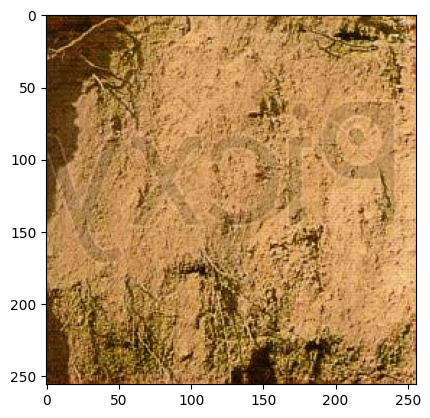

In [22]:
from PIL import Image
import matplotlib.image as mpimg
import cv2
img = mpimg.imread(r'/content/Dataset/Alluvial_Soil/Alluvial_Soil_0.jpg')
imgplot = plt.imshow(img)
plt.show()

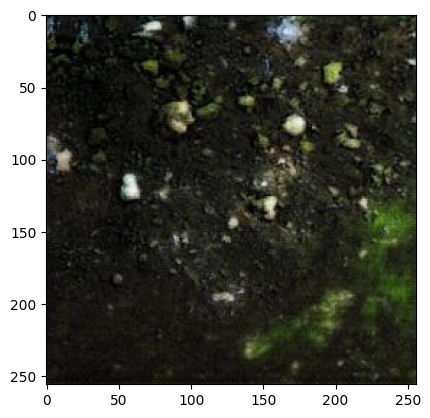

In [23]:
img = mpimg.imread(r'/content/Dataset/Black_Soil/Black_Soil_0.jpg')
imgplot = plt.imshow(img)
plt.show()

In [76]:
filenames = os.listdir('/content/o_Dataset')
print(filenames)

['Mountain_Soil', 'Black_Soil', 'Red_Soil', 'Yellow_Soil', 'Arid_Soil', 'Laterite_Soil', 'Alluvial_Soil']


Preprocessing of data 
- resize images
- rbg -> rgb

In [77]:
base="/content/o_Dataset"
alluvial=[]
arid=[]
black=[]
laterite=[]
mountain=[]
red=[]
yellow=[]
for files in filenames:
  if files=='Alluvial_Soil':
    alluvial = [f for f in os.listdir(os.path.join(base, files))]
  elif files=='Arid_Soil':
    arid = [f for f in os.listdir(os.path.join(base, files))]
  elif files=='Black_Soil':
    black = [f for f in os.listdir(os.path.join(base, files))]
  elif files=='Laterite_Soil':
    laterite = [f for f in os.listdir(os.path.join(base, files))]
  elif files=='Mountain_Soil':
    mountain = [f for f in os.listdir(os.path.join(base, files))]
  elif files=='Red_Soil':
    red = [f for f in os.listdir(os.path.join(base, files))]
  elif files=='Yellow_Soil':
    yellow = [f for f in os.listdir(os.path.join(base, files))]

print("#####################")
print(len(alluvial),len(arid),len(black),len(laterite),len(mountain),len(red),len(yellow))
print("total=",len(alluvial)+len(arid)+len(black)+len(laterite)+len(mountain)+len(red)+len(yellow))
print("#################")
print(alluvial[0:5])
print("################")
print(arid[0:5])
print("################")
print(black[0:5])
print("################")
print(laterite[0:5])
print("################")
print(mountain[0:5])
print("################")
print(red[0:5])
print("################")
print(yellow[0:5])
print("################")

#####################
52 284 255 219 201 109 69
total= 1189
#################
['Alluvial_Soil_50.jpg', 'Alluvial_Soil_2.jpg', 'Alluvial_Soil_1.jpg', 'Alluvial_Soil_42.jpg', 'Alluvial_Soil_19.jpg']
################
['Arid_Soil_203.jpg', 'Arid_Soil_88.jpg', 'Arid_Soil_260.jpg', 'Arid_Soil_143.jpg', 'Arid_Soil_223.jpg']
################
['Black_Soil_151.jpg', 'Black_Soil_9.jpg', 'Black_Soil_171.jpg', 'Black_Soil_75.jpg', 'Black_Soil_18.jpg']
################
['Laterite_Soil_92.jpg', 'Laterite_Soil_111.jpg', 'Laterite_Soil_7.jpg', 'Laterite_Soil_185.jpg', 'Laterite_Soil_45.jpg']
################
['Mountain_Soil_71.jpg', 'Mountain_Soil_132.jpg', 'Mountain_Soil_26.jpg', 'Mountain_Soil_108.jpg', 'Mountain_Soil_29.jpg']
################
['Red_Soil_84.jpg', 'Red_Soil_62.jpg', 'Red_Soil_80.jpg', 'Red_Soil_1.jpg', 'Red_Soil_46.jpg']
################
['Yellow_Soil_24.jpg', 'Yellow_Soil_54.jpg', 'Yellow_Soil_17.jpg', 'Yellow_Soil_56.jpg', 'Yellow_Soil_44.jpg']
################


In [78]:
original_path = '/content/o_Dataset'
new_path = '/content/images_resized_improved_test/'

if not os.path.exists(new_path):
    os.makedirs(new_path)

In [79]:
print("Preprocessing images...")
soil_folders = os.listdir(original_path)
for folder in soil_folders:
    folder_path = os.path.join(original_path, folder)
    if os.path.isdir(folder_path):
        print(f"Processing folder: {folder}")
        output_subfolder = os.path.join(new_path, folder)
        if not os.path.exists(output_subfolder):
            os.makedirs(output_subfolder)

        for file in os.listdir(folder_path):
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
                src_path = os.path.join(folder_path, file)
                try:
                    img = Image.open(src_path)
                    img = img.convert('RGB')
                    img = img.resize((224, 224), Image.LANCZOS)
                    target_path = os.path.join(output_subfolder, file)
                    img.save(target_path, "JPEG", quality=95)
                except Exception as e:
                    print(f"Error processing {file}: {e}")

print("Image preprocessing complete!")

Preprocessing images...
Processing folder: Mountain_Soil
Processing folder: Black_Soil
Processing folder: Red_Soil
Processing folder: Yellow_Soil
Processing folder: Arid_Soil
Processing folder: Laterite_Soil
Processing folder: Alluvial_Soil
Image preprocessing complete!


In [36]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Spliting into training set 
- use labels = inferred , because it takes all the folder name as class names
- label_mode = categorical , because we have more than 2 features
- image size = (256,256)

In [37]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/images_resized_improved',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 5097 files belonging to 7 classes.


Spliting into validation set 
- use labels = inferred , because it takes all the folder name as class names
- label_mode = categorical , because we have more than 2 features
- image size = (256,256)

In [38]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/images_resized_improved',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 5097 files belonging to 7 classes.


In [39]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 7), dtype=tf.float32, name=None))>

In [40]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[ 45.         32.         23.       ]
   [ 51.5        38.5        29.5      ]
   [ 61.9375     48.9375     39.9375   ]
   ...
   [ 21.5625     18.5625      9.5625   ]
   [ 26.3125     23.3125     14.3125   ]
   [ 32.         29.         20.       ]]

  [[ 62.0625     49.0625     40.0625   ]
   [ 56.01953    43.01953    34.01953  ]
   [ 55.742188   42.742188   33.742188 ]
   ...
   [ 20.800781   17.800781    8.800781 ]
   [ 23.722656   20.722656   11.722656 ]
   [ 28.75       25.75       16.75     ]]

  [[ 68.0625     55.0625     46.0625   ]
   [ 61.359375   48.359375   39.359375 ]
   [ 60.54297    48.960938   39.48828  ]
   ...
   [ 23.847656   20.847656   13.222656 ]
   [ 25.875      22.875      15.25     ]
   [ 30.75       27.75       20.125    ]]

  ...

  [[ 43.0625     46.375      34.4375   ]
   [ 33.464844   36.777344   24.839844 ]
   [ 19.21875    21.628906    9.90625  ]
   ...
   [ 33.996094   32.996094   27.996094 ]
   [ 24.128906   23.128906   18.128906 ]
   [ 

In [41]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

Sequential model with [32,64,128,256,512] filter size
- Dropout of 25% and 40% to prevent overfitting
- Neuron/hidden layer of 1500
- output layer with 38 dense layer , which is same as number of classes in dataset
- using 'relu' in filters extraction and 'softmax' for output layer

In [42]:
model = Sequential()

In [43]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[256,256,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [44]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [45]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [46]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [47]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [48]:
model.add(Dropout(0.25))

In [49]:
model.add(Flatten())

In [50]:
model.add(Dense(units=1500,activation='relu'))

In [51]:
model.add(Dropout(0.4))

In [52]:
#Output Layer
model.add(Dense(units=7,activation='softmax'))

In [53]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [54]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 254, 254, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 127, 127, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 125, 125, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 62, 62, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 14, 14, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │    27,649,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │        10,507 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,372,231 (123.49 MB)

 Trainable params: 32,372,231 (123.49 MB)

 Non-trainable params: 0 (0.00 B)

Training........................................

In [55]:
training_history = model.fit(training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 91s 394ms/step - accuracy: 0.6788 - loss: 1.4368 - val_accuracy: 0.8319 - val_loss: 0.5485
Epoch 2/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 41s 258ms/step - accuracy: 0.8332 - loss: 0.5224 - val_accuracy: 0.9201 - val_loss: 0.2704
Epoch 3/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 82s 258ms/step - accuracy: 0.8983 - loss: 0.3306 - val_accuracy: 0.8521 - val_loss: 0.4246
Epoch 4/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 41s 256ms/step - accuracy: 0.9083 - loss: 0.2782 - val_accuracy: 0.9351 - val_loss: 0.1901
Epoch 5/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 41s 256ms/step - accuracy: 0.9067 - loss: 0.2627 - val_accuracy: 0.9107 - val_loss: 0.2502
Epoch 6/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 41s 257ms/step - accuracy: 0.9071 - loss: 0.2747 - val_accuracy: 0.9101 - val_loss: 0.2624
Epoch 7/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 41s 255ms/step - accuracy: 0.9150 - loss: 0.2592 - val_accuracy: 0.9156 - val_loss: 0.2494
Epoch 8/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 41s 256ms/step - accuracy: 0.9093 - loss: 0

Evaluating the model on train_set and valid_set
- Give 2% of loss and 99% of accuracy - for train_set
- Give 8% of loss and 97% of accuracy - for valid_set

In [56]:
#Model Evaluation on Training set
train_loss,train_acc = model.evaluate(training_set)

160/160 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - accuracy: 0.9428 - loss: 0.1754


In [57]:
print(train_loss,train_acc)

0.16546395421028137 0.9442809224128723


In [58]:
#Model on Validation set
val_loss,val_acc = model.evaluate(validation_set)

160/160 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - accuracy: 0.9398 - loss: 0.1770


In [59]:
print(val_loss,val_acc)

0.16546401381492615 0.9442809224128723


Model saving to directory

In [60]:
model.save("trained_soil_model.keras")

In [61]:
training_history.history

{'accuracy': [0.7888954281806946,
  0.8646262288093567,
  0.9054345488548279,
  0.9123013615608215,
  0.9140670895576477,
  0.9203453063964844,
  0.9221110343933105,
  0.9203453063964844,
  0.9315283298492432,
  0.9344712495803833],
 'loss': [0.7624351978302002,
  0.43533942103385925,
  0.30246344208717346,
  0.2726038098335266,
  0.2509588301181793,
  0.23134449124336243,
  0.22914369404315948,
  0.22972483932971954,
  0.19651351869106293,
  0.19890573620796204],
 'val_accuracy': [0.8318618535995483,
  0.9201490879058838,
  0.8520698547363281,
  0.9350598454475403,
  0.9107317924499512,
  0.9101431965827942,
  0.9156366586685181,
  0.9252501726150513,
  0.9101431965827942,
  0.9442809224128723],
 'val_loss': [0.5484945774078369,
  0.2703816592693329,
  0.4245917797088623,
  0.19007515907287598,
  0.2502392530441284,
  0.2624318301677704,
  0.24937930703163147,
  0.2154146283864975,
  0.2367013543844223,
  0.16546399891376495]}

In [63]:
training_history.history['val_accuracy']

[0.8318618535995483,
 0.9201490879058838,
 0.8520698547363281,
 0.9350598454475403,
 0.9107317924499512,
 0.9101431965827942,
 0.9156366586685181,
 0.9252501726150513,
 0.9101431965827942,
 0.9442809224128723]

Visualization . . . . . . . . . . . . .

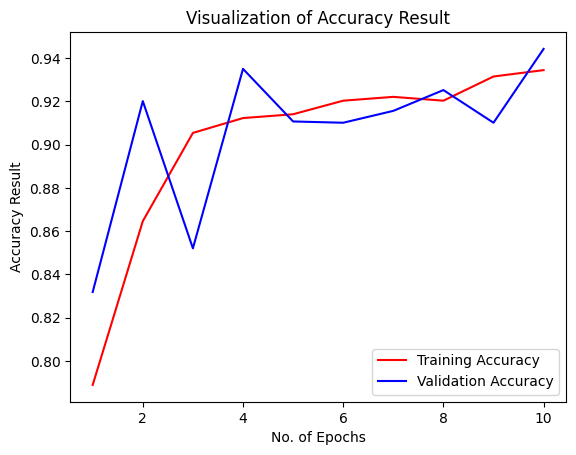

In [64]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

In [65]:
class_name = validation_set.class_names
class_name

['Alluvial_Soil',
 'Arid_Soil',
 'Black_Soil',
 'Laterite_Soil',
 'Mountain_Soil',
 'Red_Soil',
 'Yellow_Soil']

Testing......................................

In [85]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/images_resized_improved_test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 1189 files belonging to 7 classes.


In [86]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step


(array([[7.43363380e-01, 8.91431570e-02, 4.84757824e-03, ...,
         2.20994055e-02, 2.86558596e-03, 1.41157927e-02],
        [1.80234417e-01, 4.75735366e-02, 1.21980463e-03, ...,
         1.98732056e-02, 2.03527161e-03, 7.44368553e-01],
        [2.81319737e-01, 1.81780756e-01, 2.59044766e-02, ...,
         1.23320684e-01, 1.72136873e-02, 3.33503753e-01],
        ...,
        [1.36380875e-02, 1.25301749e-01, 1.28892437e-02, ...,
         8.28803539e-01, 5.29873464e-03, 3.06631997e-03],
        [3.06465607e-02, 3.49106528e-02, 6.04928355e-04, ...,
         2.69654347e-03, 5.73408790e-04, 9.27464426e-01],
        [1.51818648e-01, 4.41655278e-01, 1.85285555e-03, ...,
         3.14571261e-02, 1.26519089e-03, 1.48401514e-03]], dtype=float32),
 (1189, 7))

In [87]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [88]:
predicted_categories

<tf.Tensor: shape=(1189,), dtype=int64, numpy=array([0, 6, 6, ..., 4, 6, 1])>

In [89]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(1189, 7), dtype=float32, numpy=
array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)>

In [90]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(1189,), dtype=int64, numpy=array([2, 4, 1, ..., 4, 4, 1])>

Confusion matrix and classification report

In [91]:
from sklearn.metrics import classification_report,confusion_matrix

In [92]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

               precision    recall  f1-score   support

Alluvial_Soil       0.06      0.12      0.08        52
    Arid_Soil       0.21      0.18      0.19       284
   Black_Soil       0.18      0.18      0.18       255
Laterite_Soil       0.18      0.11      0.14       219
Mountain_Soil       0.16      0.20      0.18       201
     Red_Soil       0.13      0.15      0.14       109
  Yellow_Soil       0.03      0.03      0.03        69

     accuracy                           0.16      1189
    macro avg       0.13      0.14      0.13      1189
 weighted avg       0.16      0.16      0.16      1189



In [93]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[ 6, 13, 10,  6, 11,  2,  4],
       [25, 51, 78, 34, 58, 26, 12],
       [25, 58, 47, 25, 56, 26, 18],
       [18, 44, 45, 24, 49, 23, 16],
       [ 9, 45, 41, 19, 40, 28, 19],
       [ 9, 20, 19, 15, 24, 16,  6],
       [ 6, 14, 20,  8, 13,  6,  2]])

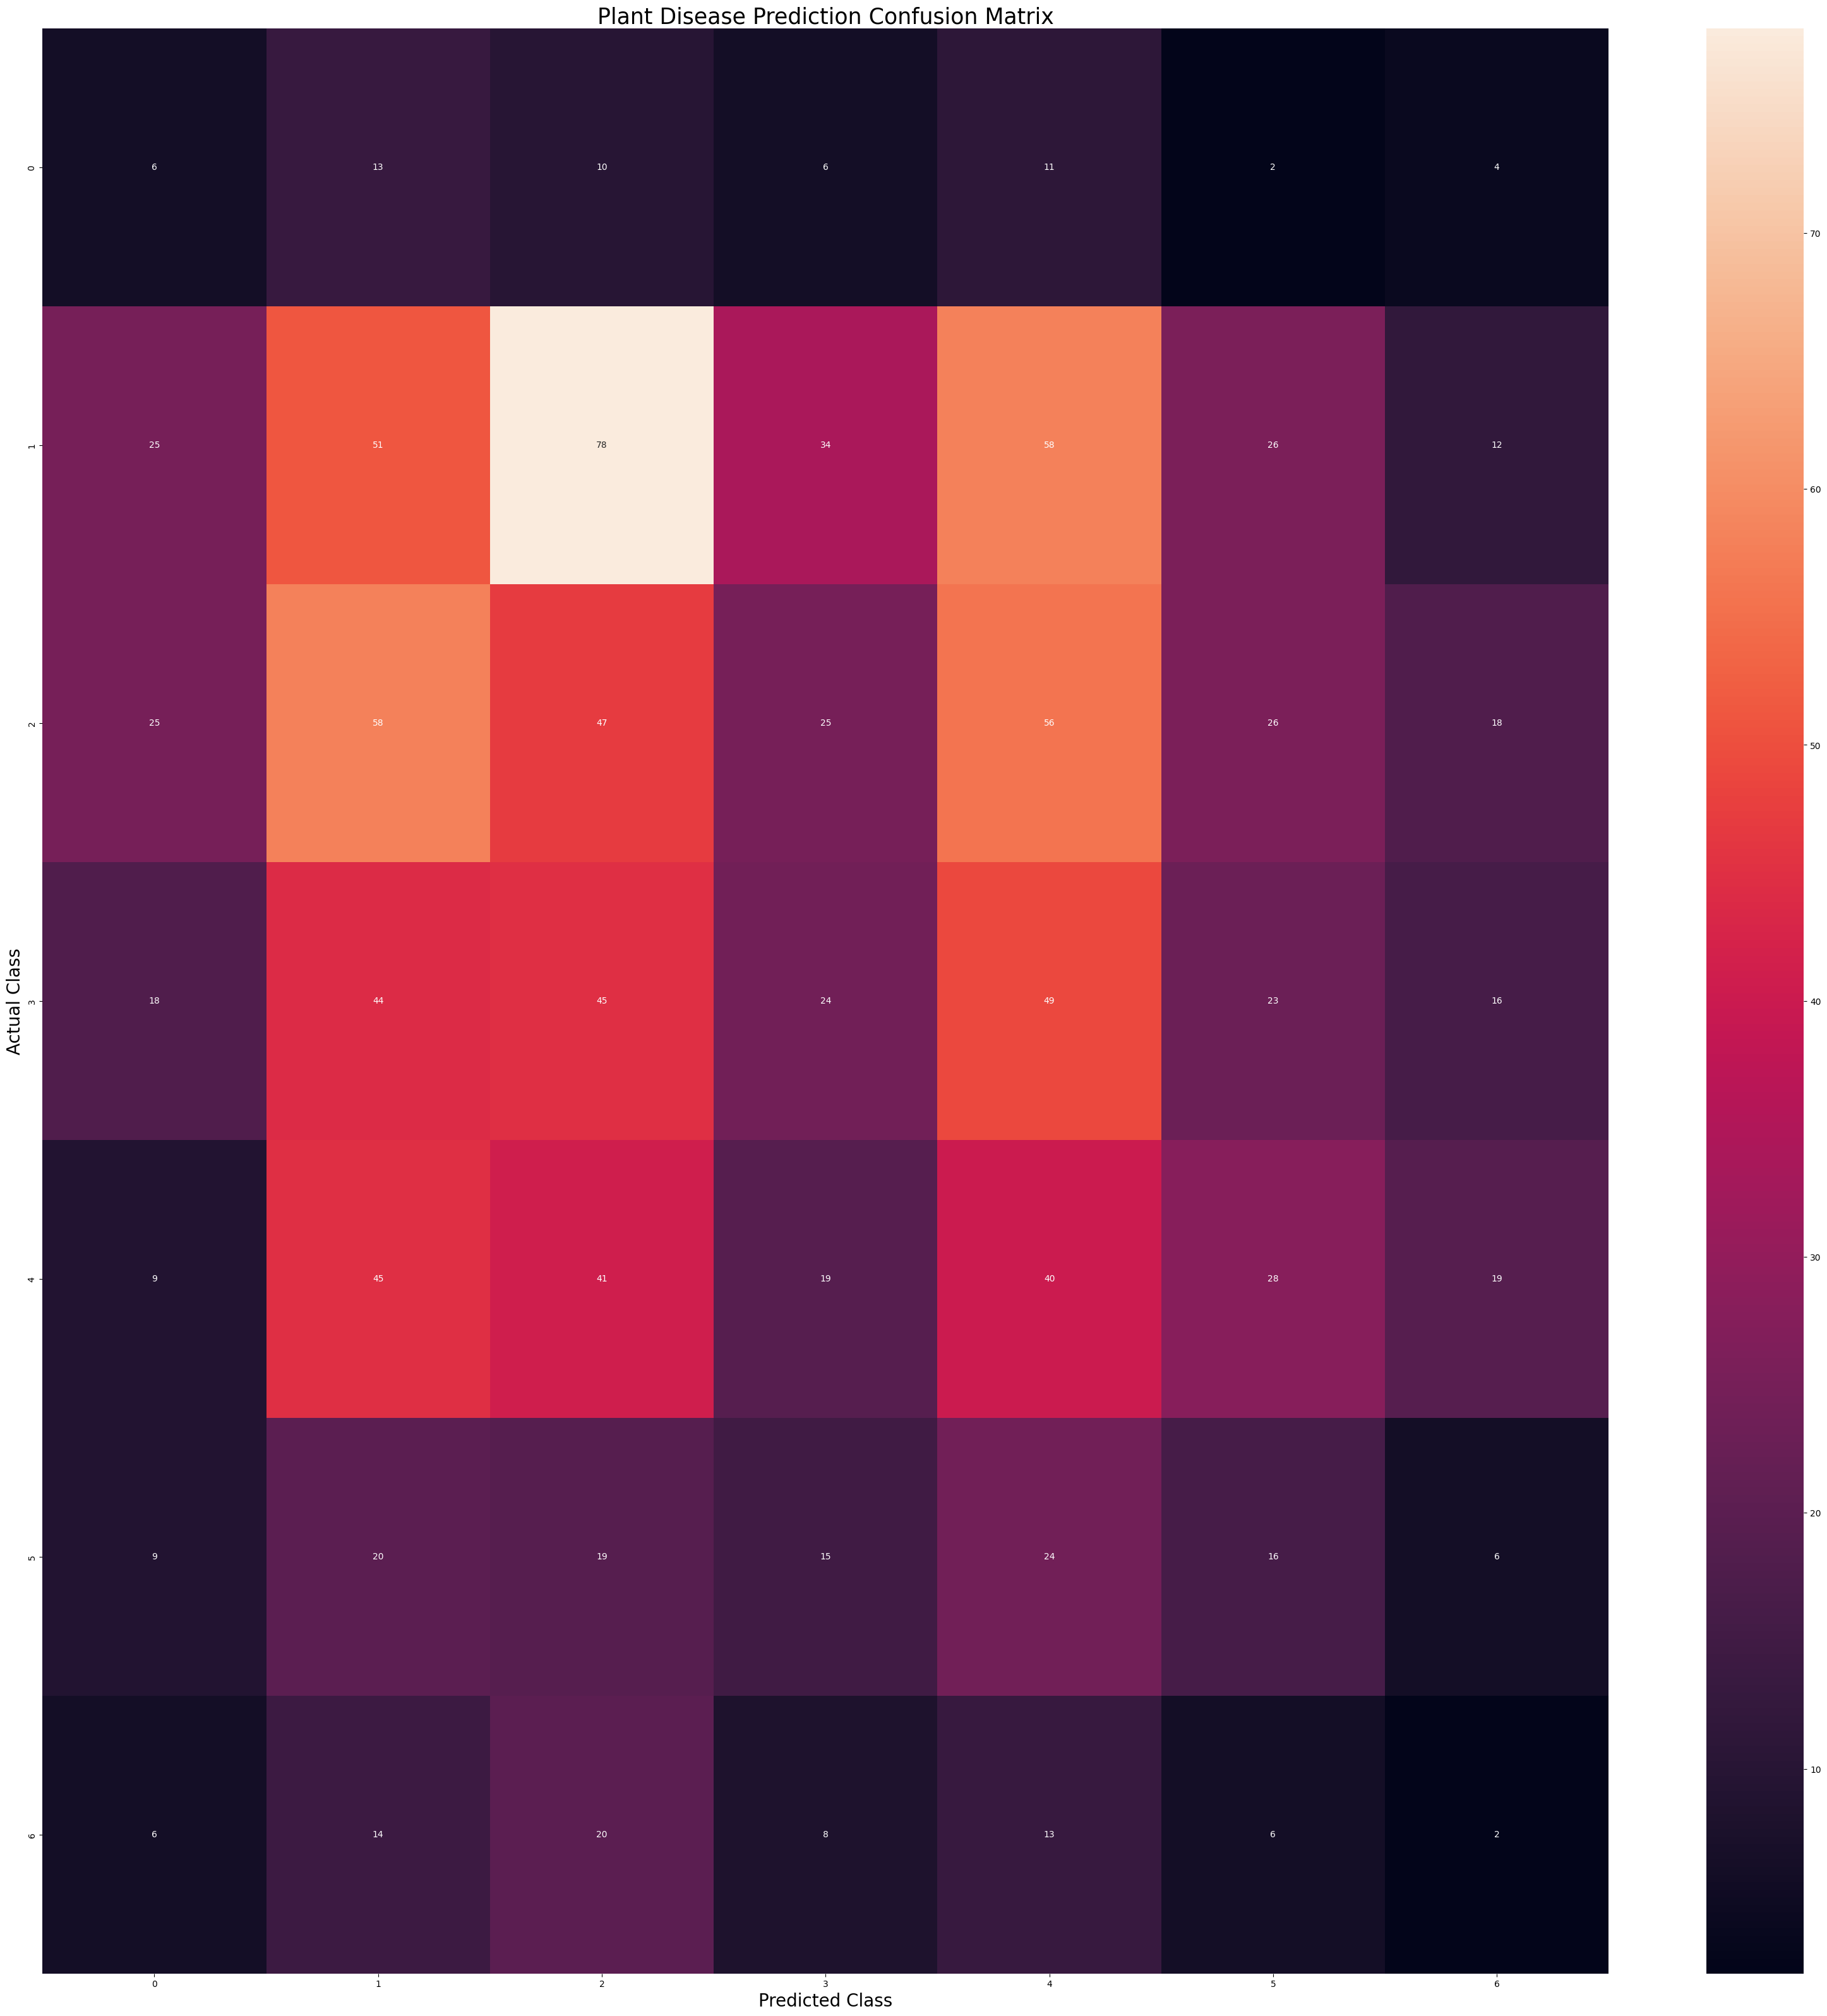

In [94]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=25)
plt.show()

In [95]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

Load pretrained model from the directory

In [96]:
model  = tf.keras.models.load_model('/content/trained_soil_model.keras')

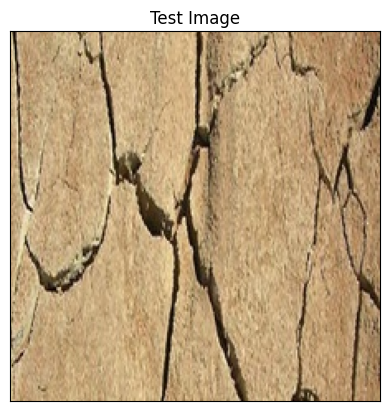

In [104]:
import cv2
image_path = "/content/images_resized_improved_test/Arid_Soil/Arid_Soil_10.jpg"
#Reading Image
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Convert BGR image to RGB

#Displaying Image
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

Preprocessing of Test image , for prediction

In [105]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(256, 256))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr]) #Convert single image to a batch
print(input_arr.shape)

(1, 256, 256, 3)


In [107]:
prediction = model.predict(input_arr)
prediction,prediction.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


(array([[0.06306321, 0.72350514, 0.01989667, 0.08219834, 0.10283737,
         0.0029714 , 0.00552786]], dtype=float32),
 (1, 7))

Picks up the max probability from array

In [108]:
result_index = np.argmax(prediction)
result_index

np.int64(1)

In [109]:
class_name=['Alluvial_Soil',
 'Arid_Soil',
 'Black_Soil',
 'Laterite_Soil',
 'Mountain_Soil',
 'Red_Soil',
 'Yellow_Soil']

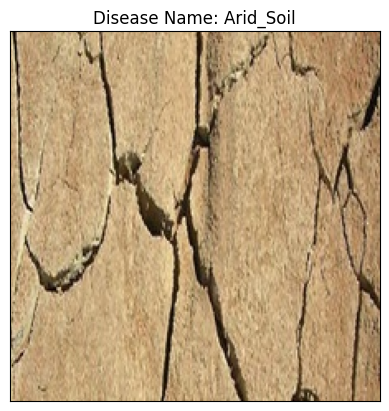

In [110]:
#Displaying Result of disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()